## Crime Time - Acquisition

- Source data is from https://data.austintexas.gov/Public-Safety/Annual-Crime-Dataset-2015/spbg-9v94
    
- Public data that was exported originally to Apple Numbers CSV

### Imports

- standard at the beginning; will adjust as we need them

In [1]:
# import warnings
# warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pull in the data from csv 

# format:
#  dataframe = pd.read_csv(r"path.csv")

df = pd.read_csv (r"/Users/DataScience/Desktop/Annual_Crime_Dataset_2015.csv")

df


,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,18.13,3130483.0,10102366.0
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,21.05,3124730.0,10090296.0
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,18.35,3135985.0,10117220.0
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,18.13,3129896.0,10096032.0
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,24.27,3110455.0,10039340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,8.02,3124675.0,10072478.0
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,204.03,3096285.0,10140738.0
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,17.18,3109504.0,10101310.0
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,22.11,3150290.0,10079608.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38573 entries, 0 to 38572
Data columns (total 13 columns):
GO Primary Key                           38573 non-null int64
Council District                         38401 non-null float64
GO Highest Offense Desc                  38573 non-null object
Highest NIBRS/UCR Offense Description    38573 non-null object
GO Report Date                           38573 non-null object
GO Location                              38092 non-null object
Clearance Status                         36649 non-null object
Clearance Date                           36649 non-null object
GO District                              38573 non-null object
GO Location Zip                          38414 non-null float64
GO Census Tract                          38414 non-null float64
GO X Coordinate                          37981 non-null float64
GO Y Coordinate                          37981 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 3.8+ MB


In [5]:
# Lotsa 'nulls' it seems...

print("\nCount total NaN at each column in a DataFrame : \n \n", 
      df.isnull().sum())


Count total NaN at each column in a DataFrame : 
 
 GO Primary Key                              0
Council District                          172
GO Highest Offense Desc                     0
Highest NIBRS/UCR Offense Description       0
GO Report Date                              0
GO Location                               481
Clearance Status                         1924
Clearance Date                           1924
GO District                                 0
GO Location Zip                           159
GO Census Tract                           159
GO X Coordinate                           592
GO Y Coordinate                           592
dtype: int64


#### Quick glance of the data shows us we're dealing with a lot of nulls, particularly in the following columns:

- 172 in 'Council District' (~ 0.44%)

- 481 in 'GO Location' (~ 1.24%)

- 1,924 in BOTH 'Clearance Status' and 'Clearance Date' (~ 5.0%)

- 159 in BOTH 'GO Location Zip' and 'GO Census Tract' (~ 0.41%)

- 592 in BOTH 'GO X Coordinate' and 'GO Y Coordinate' (~ 1.5%)

> #### Also, we'll have to change the datatypes in the following columns from strings to floats / ints:

    - 'GO Highest Offense Desc'
    - 'Highest NIBRS / UCR Offense Description'
    - 'GO Report Date'
    - 'GO Location'
    - 'Clearance Status'
    - 'Clearance Date'
    - 'GO District'

In [6]:
# Taking a look at the unique values 

print(df.apply(pd.Series.nunique, axis=0))

GO Primary Key                           38573
Council District                            10
GO Highest Offense Desc                     44
Highest NIBRS/UCR Offense Description        7
GO Report Date                             365
GO Location                              16764
Clearance Status                             3
Clearance Date                             433
GO District                                 11
GO Location Zip                             47
GO Census Tract                            205
GO X Coordinate                          14206
GO Y Coordinate                          15187
dtype: int64


**Seeing if the 'df.apply' function worked by checking individual counts:**

In [7]:
print("The unique values in 'GO Primary Key' are: ")
print(df["GO Primary Key"].nunique())
print("The unique values in 'Council District' are: ")
print(df["Council District"].nunique())
print("The unique values in 'GO Highest Offense Desc' are: ")
print(df["GO Highest Offense Desc"].nunique())
print("The unique values in 'GO Location' are: ")
print(df["GO Location"].nunique())
print("The unique values in 'GO Location Zip' are: ")
print(df["GO Location Zip"].nunique())

The unique values in 'GO Primary Key' are: 
38573
The unique values in 'Council District' are: 
10
The unique values in 'GO Highest Offense Desc' are: 
44
The unique values in 'GO Location' are: 
16764
The unique values in 'GO Location Zip' are: 
47


**^^Checks out^^**

**Find out where the NaN values are in each of the columns to determine whether or not they should be kept.**

In [8]:
df[df.isnull().any(axis=1)]

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
34,201511491,4.0,THEFT BY SHOPLIFTING,Theft,1-Jan-15,6001 AIRPORT BLVD,NaN,NaN,I,78752.0,15.03,3122890.0,10091831.0
50,2015560616,4.0,RAPE,Rape,25-Feb-15,NaN,O,22-Apr-15,E,78758.0,18.05,NaN,NaN
60,2015520845,2.0,RAPE,Rape,21-Feb-15,NaN,O,11-Mar-15,F,78744.0,24.27,NaN,NaN
84,201520100,1.0,AGG ROBBERY/DEADLY WEAPON,Robbery,2-Jan-15,1209 DELONEY ST,NaN,NaN,C,78721.0,21.09,3130038.0,10075027.0
96,201520326,4.0,BURGLARY OF RESIDENCE,Burglary,2-Jan-15,9844 QUAIL BLVD,NaN,NaN,E,78758.0,18.22,3126613.0,10108839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,20155056981,7.0,BURGLARY OF VEHICLE,Theft,31-Dec-15,10706 N MOPAC EXPY SVRD SB,NaN,NaN,A,78759.0,17.54,3116246.0,10117603.0
38538,20155057000,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-15,2000 WOODWARD ST,NaN,NaN,H,78741.0,23.07,3114537.0,10052722.0
38556,20158004696,7.0,THEFT,Theft,31-Dec-15,8900 SHOAL CREEK BLVD,NaN,NaN,B,78757.0,18.17,3116314.0,10109976.0
38563,20155056947,8.0,THEFT,Theft,31-Dec-15,4625 W WILLIAM CANNON DR,NaN,NaN,D,78749.0,17.38,3082868.0,10053773.0


### Data Dictionary

- 2,483 rows with NaN values.  That's roughly 6.4% of all the total information.  That seems like a big chunk, so let's investigate the columns and what they mean:

**Council District -** The district number in which the event occurred.  A 'NaN' value here means the district number was not documented.  Seems like we would keep it, but with less than half a percent of missing values, we can **drop the NaNs** and still maintain enough data to give an accurate depiction of the crime rate.

**GO Location -** Incident location, and it looks to be the street address where the crime occurred.  According to the website, rape locations are not listed so as to protect the id of the victim.  A quick glance at the data shows that the first NaNs we find are indeed rapes; that's a crime we don't want to eliminate from investigation, so I am **not dropping** these rows.  Instead, we can impute a value where there are NaNs.

**Clearance Status -** Used to identify whether or not a crime was solved.  

>**C** = 'Cleared by Arrest' |
>**O** = 'Cleared by Exception' |
>**N** = 'Not Cleared'

- nearly 5% of these values are 'NaN,' one, and two: they still list the crime, so **not dropping**.

**Clearance Date -** Seems to correspond directly with 'Clearance Status'; ie: the two column values match. Therefore, **will not drop** because dates are important in determining seasonality of events.  BUT need to **set these dates to datetime** for better time series analysis (*same must be done for 'GO Report Date' column*).  

**GO Location Zip -** Corresponds with the 'GO Location' street addresses, but IS included where there are 'NaN' values on street addresses with respect to rape cases.  With less than a half-percent of its fields missing values, we will **drop**.

**GO Census Tract -** Neighborhoods.  No clear info given from the website, but according to the [US Census Beureau](https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13), it's a geographic area with somewhere between 1,200 and 8,000 people.  While the glossary goes on into what the numbers and their suffixes mean, this brief description satisfies our needs.  And while less than a half-percent of the values are listed as 'NaN,' we can **drop** these rows.

**GO X Coordinate -** The geospacial x-coordinate for the corresponding crime scene location, per NAD 1983 State Plane Texas Central FIPS 4203 (US Feet), or longitudinal / latitudinal coordinates.  Given that we already have a street address and zipcode, we can not only **drop** theses 'NaN' rows, we can **drop the entire column**.

**GO Y Coordinate -**  Similar to the 'GO X Coordinate,' we can **drop the entire column**.

In [9]:
# dropping 'GO X / Y Coordinate' columns

df = df.drop(columns = ["GO X Coordinate", "GO Y Coordinate"])

In [10]:
df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,18.13
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,21.05
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,18.35
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,18.13
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,24.27


In [11]:
# setting 'GO Report Date' and 'Clearance Date' values from dates to datetime

df["GO Report Date"] = pd.to_datetime(df["GO Report Date"])
df["Clearance Date"] = pd.to_datetime(df["Clearance Date"])

In [12]:
# Sort rows by the report date and make the index that date

df = df.sort_values("GO Report Date").set_index("GO Report Date")

df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
GO Report Date,,,,,,,,,,
2015-01-01,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,9001 N IH 35 SVRD NB,N,2015-01-28,E,78753.0,18.13
2015-01-01,201510667,9.0,THEFT,Theft,211 E 3RD ST,N,2015-01-09,G,78701.0,11.00
2015-01-01,20155000091,7.0,THEFT,Theft,2525 W ANDERSON LN,N,2015-01-14,B,78757.0,15.01
2015-01-01,20155000023,4.0,THEFT,Theft,8906 PARKFIELD DR,N,2015-01-06,E,78758.0,18.20
2015-01-01,201511848,4.0,THEFT,Theft,9844 QUAIL BLVD,O,2015-02-23,E,78758.0,18.22


**So, what does the info above tell us?**

- multiple events happen every day - each row is NOT a single day, but a single, specific event

- let's now take a look at the crime by the quarter, using date ranges Jan - Mar, Apr - June, July - Sept, Oct - Dec (thus showcasing the beauty of datetimes as indeces):

In [13]:
# Return all rows from First Quarter, January 1 - March 31 

df.loc["2015-01-01":"2015-03-31"]

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
GO Report Date,,,,,,,,,,
2015-01-01,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,9001 N IH 35 SVRD NB,N,2015-01-28,E,78753.0,18.13
2015-01-01,201510667,9.0,THEFT,Theft,211 E 3RD ST,N,2015-01-09,G,78701.0,11.00
2015-01-01,20155000091,7.0,THEFT,Theft,2525 W ANDERSON LN,N,2015-01-14,B,78757.0,15.01
2015-01-01,20155000023,4.0,THEFT,Theft,8906 PARKFIELD DR,N,2015-01-06,E,78758.0,18.20
2015-01-01,201511848,4.0,THEFT,Theft,9844 QUAIL BLVD,O,2015-02-23,E,78758.0,18.22
...,...,...,...,...,...,...,...,...,...,...
2015-03-31,2015900189,4.0,THEFT BY SHOPLIFTING,Theft,9401 N IH 35 SVRD NB,NaN,NaT,E,78753.0,18.33
2015-03-31,2015901131,5.0,THEFT BY SHOPLIFTING,Theft,9500 S IH 35 SVRD SB,C,2015-05-09,F,78748.0,24.21
2015-03-31,2015901225,2.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1700 TERI RD,N,2015-04-02,F,78744.0,24.11


In [14]:
# Return all rows from Second Quarter, April 1 - June 30

df.loc["2015-04-01":"2015-06-30"] 

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
GO Report Date,,,,,,,,,,
2015-04-01,20155013549,10.0,BURGLARY OF VEHICLE,Theft,7804 HIGH HOLLOW DR,N,2015-04-01,A,78750.0,17.16
2015-04-01,20155013703,5.0,THEFT FROM AUTO,Theft,1311 S LAMAR BLVD,N,2015-04-07,D,78704.0,13.03
2015-04-01,20155013536,3.0,BURGLARY OF VEHICLE,Theft,911 BATTLE BEND BLVD,N,2015-04-07,D,78745.0,24.03
2015-04-01,20155013610,6.0,BURGLARY OF VEHICLE,Theft,7920 SAN FELIPE BLVD,N,2015-04-02,A,78729.0,204.06
2015-04-01,20155013681,4.0,BURGLARY OF VEHICLE,Theft,10401 N LAMAR BLVD,N,2015-04-16,E,78753.0,18.23
...,...,...,...,...,...,...,...,...,...,...
2015-06-30,20151811258,5.0,THEFT BY SHOPLIFTING,Theft,9300 S IH 35 SVRD SB,C,2015-07-04,F,78748.0,24.21
2015-06-30,20155028412,7.0,THEFT BY SHOPLIFTING,Theft,500 CANYON RIDGE DR,N,2015-07-20,E,78753.0,18.39
2015-06-30,20151811130,3.0,THEFT BY SHOPLIFTING,Theft,4405 E RIVERSIDE DR,N,2015-07-20,H,78741.0,23.14


In [15]:
# Return all rows from Third Quarter, July 1 - September 30

df.loc["2015-07-01":"2015-09-30"] 

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
GO Report Date,,,,,,,,,,
2015-07-01,20158002185,1.0,BURGLARY OF VEHICLE,Theft,1135 AIRPORT BLVD,N,2015-07-03,C,78721.0,21.11
2015-07-01,20155028486,3.0,BURGLARY OF VEHICLE,Theft,2900 SUNRIDGE DR,N,2015-07-03,H,78741.0,23.13
2015-07-01,20155028492,8.0,THEFT FROM AUTO,Theft,3812 SAWMILL DR,N,2015-07-01,D,78749.0,17.40
2015-07-01,20155028554,5.0,BURGLARY OF VEHICLE,Theft,3755 S CAPITAL OF TEXAS HWY NB,N,2015-07-08,D,78704.0,19.01
2015-07-01,20155028476,7.0,BURGLARY OF VEHICLE,Theft,5910 NASCO DR,N,2015-07-07,B,78757.0,15.01
...,...,...,...,...,...,...,...,...,...,...
2015-09-30,20155043168,7.0,THEFT BY SHOPLIFTING,Theft,8000 SHOAL CREEK BLVD,N,2015-10-14,B,78757.0,18.17
2015-09-30,20152731303,5.0,THEFT BY SHOPLIFTING,Theft,9300 S IH 35 SVRD SB,C,2015-09-30,F,78748.0,24.21
2015-09-30,20155043050,7.0,THEFT BY SHOPLIFTING,Theft,2525 W ANDERSON LN,N,2015-10-15,B,78757.0,15.01


In [16]:
# Return all rows from Fourth Quarter, Oct 1 - December 31

df.loc["2015-10-01":"2015-12-31"] 

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
GO Report Date,,,,,,,,,,
2015-10-01,20155043201,3.0,BURGLARY OF VEHICLE,Theft,2425 CROMWELL CIR,N,2015-10-29,H,78741.0,23.14
2015-10-01,20155043204,8.0,THEFT OF AUTO PARTS,Theft,6113 RICKERHILL LN,N,2015-10-06,D,78739.0,17.70
2015-10-01,20155043219,8.0,THEFT OF AUTO PARTS,Theft,11328 SAVIN HILL LN,N,2015-10-06,D,78739.0,17.70
2015-10-01,20152740125,3.0,THEFT,Theft,1919 BURTON DR,N,2015-10-28,H,78741.0,23.15
2015-10-01,20155043196,9.0,THEFT,Theft,1320 E OLTORF ST,N,2016-02-01,H,78704.0,23.08
...,...,...,...,...,...,...,...,...,...,...
2015-12-31,20155056997,3.0,THEFT BY SHOPLIFTING,Theft,2701 E 7TH ST,NaN,NaT,C,78702.0,9.02
2015-12-31,20153651273,5.0,THEFT BY SHOPLIFTING,Theft,9300 S IH 35 SVRD SB,NaN,NaT,F,78748.0,24.21
2015-12-31,20153651810,3.0,THEFT FROM PERSON,Theft,2100 BURTON DR,N,2016-02-09,H,78741.0,23.15


**Since the number of rows == the number of events, let's take a quick look at the data to see in which quarter most of the reported crimes took place:**

In [17]:
q1 = df.loc["2015-01-01":"2015-03-31"]
q2 = df.loc["2015-04-01":"2015-06-30"] 
q3 = df.loc["2015-07-01":"2015-09-30"] 
q4 = df.loc["2015-10-01":"2015-12-31"]

print(f"First Quarter had {q1.shape[0]} reported events take place")
print(f"Second Quarter had {q2.shape[0]} reported events take place")
print(f"Third Quarter had {q3.shape[0]} reported events take place")
print(f"Fourth Quarter had {q4.shape[0]} reported events take place")

First Quarter had 9143 reported events take place
Second Quarter had 9827 reported events take place
Third Quarter had 10036 reported events take place
Fourth Quarter had 9567 reported events take place


**^^Clearly, Third Quarter had the most reported events, followed by Quarters Two, Four, and One.**

  lab  val
0   A   10
1   B   30
2   C   20


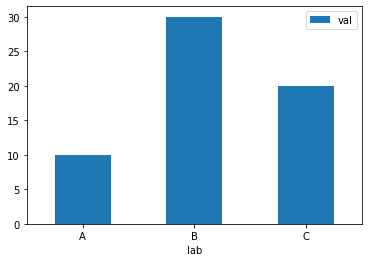

In [33]:

df2 = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

print(df2)

ax = df2.plot.bar(x='lab', y='val', rot=0)

# ax = df.plot.bar(x="GO Report Date") 

# #, y='val', rot=0)

In [19]:
# imputing values for NaN in 'GO Location:'

from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "constant")